# Import Libraries

In [1]:
import pandas as pd  #Data manipulation and analysis
import numpy as np # numerical operations
import matplotlib.pyplot as plt # Basic Plotting
import seaborn as sns #Statistical visualization

#plt.style.use('dark_background')

**Load Dataset**

Read data into pandas framework.

In [2]:
path = "../data/HR_Data_MNC.csv"
df = pd.read_csv(path)

# Quick Data Inspection

**View first few rows to verify data structure**

In [3]:
df.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


**Check dataset shape (rows, columns)**

In [4]:
df.shape

(2000000, 12)

**View column names and data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 122.1+ MB


**Summary statistics for numerical columns**

In [6]:
df.describe()

,Unnamed: 0,Performance_Rating,Experience_Years,Salary_INR
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.000148e+00,5.010287e+00,8.968878e+05
std,5.773504e+05,1.413973e+00,3.608823e+00,4.026103e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+05
25%,4.999998e+05,2.000000e+00,2.000000e+00,6.163460e+05
50%,9.999995e+05,3.000000e+00,5.000000e+00,8.110265e+05
75%,1.499999e+06,4.000000e+00,8.000000e+00,1.073745e+06
max,1.999999e+06,5.000000e+00,1.500000e+01,2.999976e+06


**Check null/missing values per columns**

In [7]:
df.isnull().sum()

Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

# Data Cleaning

By viewing the data, we can see that Unnamed: 0, is the serial number series. While Employee_ID is the unique primary key. So we can remove  Unnamed: 0.

In [8]:
df.drop(columns=["Unnamed: 0"],axis=1, inplace=True)

In [9]:
df.columns

Index(['Employee_ID', 'Full_Name', 'Department', 'Job_Title', 'Hire_Date',
       'Location', 'Performance_Rating', 'Experience_Years', 'Status',
       'Work_Mode', 'Salary_INR'],
      dtype='object')

Lets check Employee_ID for duplicate values.Also check is it unique incremental key for each record or not.

In [10]:
df["Employee_ID"].duplicated().sum()

0

In [11]:
df["Employee_ID"].is_unique

True

There is no duplicate Employee_ID and each ID is unique.

For the Department name lets check which departments are there. is there any duplicate departmentname or not.

In [12]:
df["Department"].unique()

array(['IT', 'Marketing', 'HR', 'Operations', 'Finance', 'Sales', 'R&D'],
      dtype=object)

In [13]:
df['Department'].value_counts().sort_values(ascending=False)

IT            601042
Sales         400031
Operations    300095
Marketing     240081
Finance       199873
HR            159119
R&D            99759
Name: Department, dtype: int64

For the Job_Title lets check which Job_Title are there. Also check for duplicate Job_tilte

In [14]:
df["Job_Title"].unique()

array(['Software Engineer', 'SEO Specialist', 'HR Manager',
       'Logistics Coordinator', 'Finance Manager', 'Account Manager',
       'Financial Analyst', 'Sales Executive', 'Operations Executive',
       'HR Executive', 'Sales Director', 'DevOps Engineer',
       'Content Strategist', 'Marketing Executive', 'Research Scientist',
       'Accountant', 'IT Manager', 'Supply Chain Manager', 'Data Analyst',
       'Talent Acquisition Specialist', 'Product Developer',
       'Operations Director', 'CTO', 'Business Development Manager',
       'Lab Technician', 'CFO', 'Brand Manager', 'HR Director',
       'Innovation Manager'], dtype=object)

Check the format of joining date. are all rows properly formatted?

In [15]:
df["Hire_Date"].head()

0    2011-08-10
1    2018-03-02
2    2023-03-20
3    2023-10-12
4    2024-12-09
Name: Hire_Date, dtype: object

The data type of hire date is object. Change it to date.

In [16]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [17]:


def check_strict_format(df, column_name, date_format):
    # Try converting with a strict format, coercing errors to NaT
    try:
        validated_dates = pd.to_datetime(df[column_name], format=date_format, errors='coerce')
        
        # Check for NaT values
        invalid_dates_count = validated_dates.isna().sum()
        
        if invalid_dates_count == 0:
            print(f"All values in '{column_name}' strictly follow the '{date_format}' format.")
            return True, invalid_dates_count
        else:
            print(f"Found {invalid_dates_count} values not matching the '{date_format}' format.")
            invalid_rows = df[validated_dates.isna()]
            print("Non-matching rows:")
            print(invalid_rows)
            return False, invalid_dates_count
            
    except ValueError as e:
        print(f"An error occurred, likely due to a malformed format string: {e}")
        return False, -1

# Example usage:
# check_strict_format(df, 'your_date_column', '%Y-%m-%d')


In [18]:
check_strict_format(df, 'Hire_Date', '%Y-%m-%d')

All values in 'Hire_Date' strictly follow the '%Y-%m-%d' format.


(True, 0)

In [19]:
df['Status'].unique()

array(['Resigned', 'Active', 'Terminated', 'Retired'], dtype=object)

In [20]:
df['Status'].value_counts()

Active        1401558
Resigned       398660
Retired         99912
Terminated      99870
Name: Status, dtype: int64

In [21]:
df['Work_Mode'].unique()

array(['On-site', 'Remote'], dtype=object)

In [22]:
df['Work_Mode'].value_counts()

On-site    1199109
Remote      800891
Name: Work_Mode, dtype: int64

Check performance rationg column here.

In [23]:
df['Experience_Years'].unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15],
      dtype=int64)

In [24]:
df['Experience_Years'].value_counts().sort_index()

0     198775
1     199162
2     199924
3     200522
4     199866
5     160112
6     160410
7     159005
8     160212
9     160223
10     41209
11     40146
12     39709
13     40149
14     40005
15       571
Name: Experience_Years, dtype: int64

Check Performance rating column here.


In [25]:
df['Performance_Rating'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

In [26]:
df['Performance_Rating'].value_counts().sort_values()

5    399727
1    399756
3    399814
2    400174
4    400529
Name: Performance_Rating, dtype: int64

## Univariate distribution on salary

In [27]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}' if abs(x) >= 1 else f'{x}')
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.use_mathtext'] = False

def apply_global_formatter():
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)


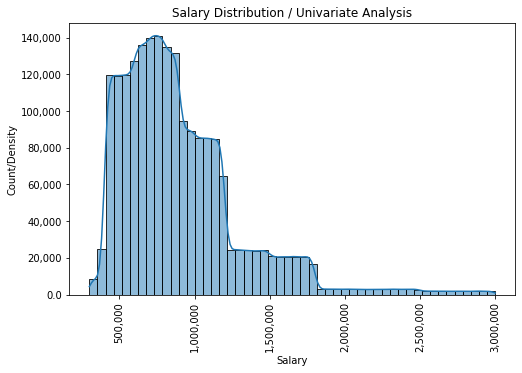

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary_INR'], kde= True ,bins=50)
plt.title("Salary Distribution / Univariate Analysis")
apply_global_formatter()
plt.xlabel("Salary")
plt.ylabel("Count/Density")
plt.xticks(rotation=90)
plt.show()

# Questions

## 1. Workforce Composition & Structure

### 1. What is the headcount distribution across departments?

In [29]:
df["Department"].value_counts()

IT            601042
Sales         400031
Operations    300095
Marketing     240081
Finance       199873
HR            159119
R&D            99759
Name: Department, dtype: int64

### 2. How are employees distributed by work mode (on-site vs. remote)?

In [30]:
df["Work_Mode"].value_counts()

On-site    1199109
Remote      800891
Name: Work_Mode, dtype: int64

### 3. Which country has the highest employee concentration?

In [31]:
df['Location'].head(5)

0                         Isaacland, Denmark
1                    Anthonyside, Costa Rica
2           Port Christinaport, Saudi Arabia
3    Port Shelbychester, Antigua and Barbuda
4       Lake Kimberly, Palestinian Territory
Name: Location, dtype: object

In [36]:
df['Location'].isnull().sum()

0

In [37]:
df['Country'] = df['Location'].apply(lambda x: str(x.split(",")[1]))

In [39]:
df['Country'].value_counts()

 Congo                     16286
 Korea                     16285
 Sri Lanka                  8409
 Switzerland                8391
 British Virgin Islands     8373
                           ...  
 Indonesia                  7983
 Kazakhstan                 7973
 Montenegro                 7972
 Bhutan                     7971
 Palestinian Territory      7895
Name: Country, Length: 243, dtype: int64

### Answer 3. Congo has the highest employee concentration.

### 4. How are hiring volumes distributed across departments and job roles?

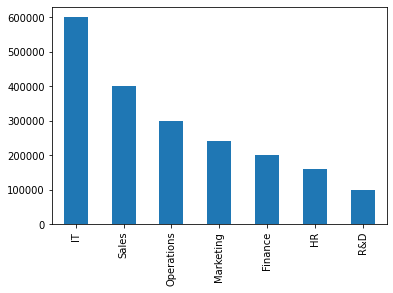

In [41]:
df['Department'].value_counts().plot(kind='bar')
plt.show()

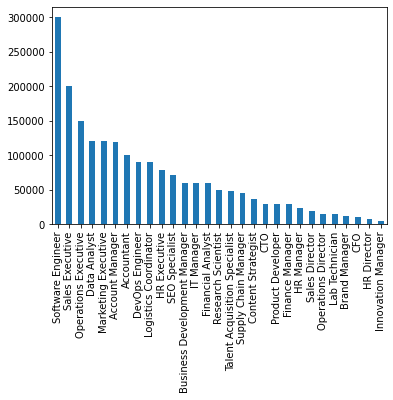

In [48]:
plt.Figure(figsize=(14,6))
df['Job_Title'].value_counts().plot(kind='bar')
plt.show()